### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the Boston Housing dataset

In [2]:
boston = pd.read_csv("Boston.csv")

In [3]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Q.1. Report the “class” of the data set. How many rows and columns are in this data set? What do the rows and columns represent?

In [4]:
print(type(boston))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(boston.shape)

(506, 15)


- Class of dataset: pandas.core.frame.DataFrame

- Rows: 506 (each row represents a suburb/town in Boston)

- Columns: 14

- 13 predictor variables

- 1 response variable (MEDV: median value of owner-occupied homes in $1000s)

### Q.2. Create a smaller data set with the variables median value of owner-occupied homes, per capita crime rate, nitrogen oxides concentration, proportion of blacks and percentage of lower status of the population. Choosing medianvalue of owner occupied homes as the response and the rest as the pre-dictors, make scatter plots of the response versus each predictor. Present the scatter plots in different panels of the same graph. Comment on your findings.

-- Selected variables:

- MEDV → Response

- CRIM → Per capita crime rate

- NOX → Nitrogen oxides concentration

- BLACK → Proportion of blacks

- LSTAT → % lower status population

In [10]:
subset = boston[["medv", "crim", "nox", "black", "lstat"]]
subset.head()

,medv,crim,nox,black,lstat
0,24.0,0.00632,0.538,396.90,4.98
1,21.6,0.02731,0.469,396.90,9.14
2,34.7,0.02729,0.469,392.83,4.03
3,33.4,0.03237,0.458,394.63,2.94
4,36.2,0.06905,0.458,396.90,5.33


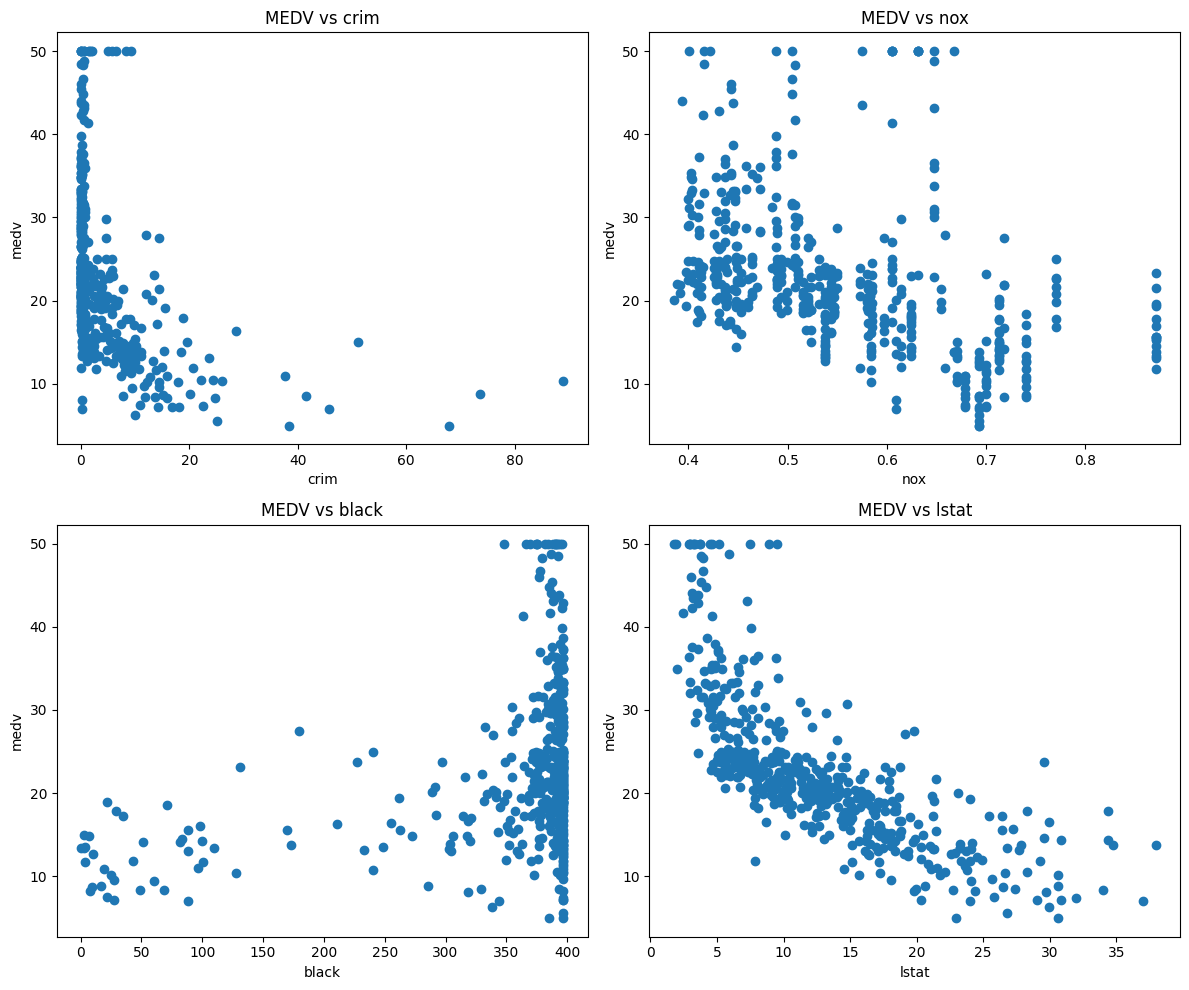

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
predictors = ["crim", "nox", "black", "lstat"]

for ax, var in zip(axes.flatten(), predictors):
    ax.scatter(subset[var], subset["medv"])
    ax.set_xlabel(var)
    ax.set_ylabel("medv")
    ax.set_title(f"MEDV vs {var}")

plt.tight_layout()
plt.show()

- CRIM vs MEDV: Strong negative relationship (higher crime → lower house value)

- NOX vs MEDV: Clear negative trend

- B vs MEDV: Weak positive association

- LSTAT vs MEDV: Very strong negative relationship (most influential predictor)

### Q.3. Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors mentioned in (2), for that suburb. How do these values compare to the overall ranges for those pre-dictors? Comment on your findings. Hint: Mention which percentile these values belong to.

In [12]:
## Suburb with the lowest median value of homesabs
min_medv_row = subset.loc[subset["medv"].idxmin()]
min_medv_row

medv       5.0000
crim      38.3518
nox        0.6930
black    396.9000
lstat     30.5900
Name: 398, dtype: float64

In [13]:
# Percentile comparison with overall rangesabs
percentiles = subset.rank(pct=True) * 100
percentiles.loc[min_medv_row.name]

medv      0.296443
crim     98.814229
nox      84.486166
black    88.142292
lstat    97.826087
Name: 398, dtype: float64

- The suburb with lowest MEDV lies:

-- Top percentile for CRIM and LSTAT

-- High percentile for NOX

-- Low percentile for B

- This suburb is socio-economically disadvantaged

- Statistically, these predictor values fall in extreme tails, not near the mean

### 4. Does any suburb of Boston stand out for having notably high crime rates, tax rates, or pupil–teacher ratios? Hint: Use a boxplot to detect any outliers. If so, identify the suburbs that show the outlier values.

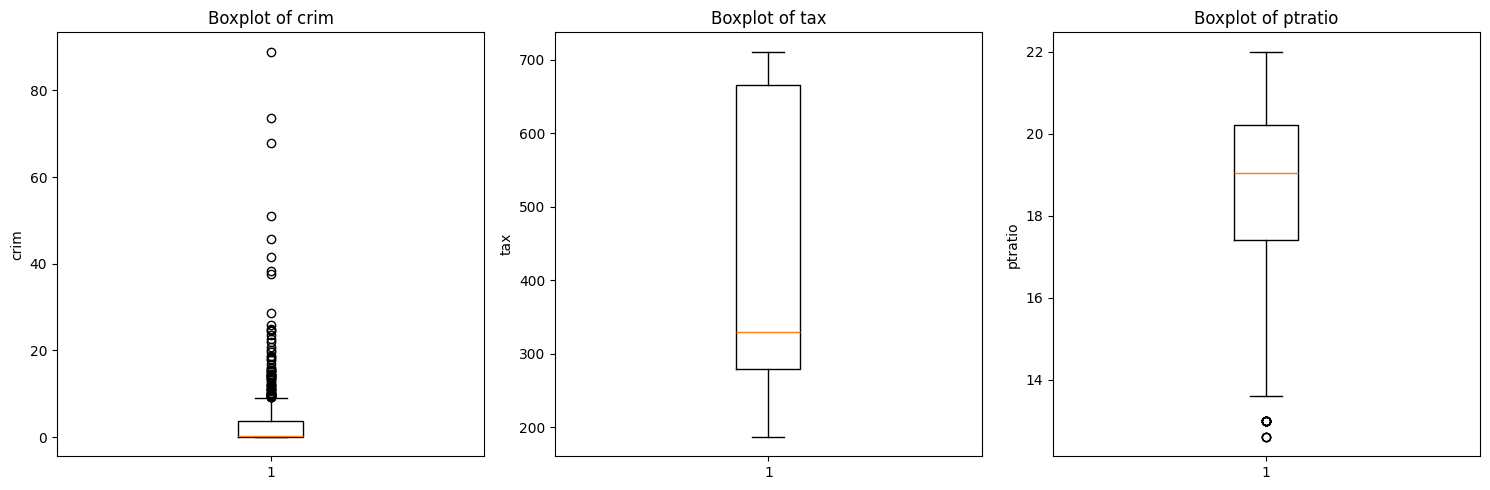

In [15]:
# Detect outliers using boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

variables = ["crim", "tax", "ptratio"]

for ax, var in zip(axes, variables):
    ax.boxplot(boston[var])
    ax.set_title(f"Boxplot of {var}")
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

In [18]:
# Identify suburbs with outliersabs
outliers = {}

for var in variables:
    Q1 = boston[var].quantile(0.25)
    Q3 = boston[var].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    
    outliers[var] = boston[boston[var] > upper].index.tolist()

outliers

{'crim': [367,
  371,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  384,
  385,
  386,
  387,
  388,
  392,
  394,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  422,
  425,
  426,
  427,
  429,
  431,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  441,
  443,
  444,
  445,
  447,
  448,
  454,
  468,
  469,
  477,
  478,
  479],
 'tax': [],
 'ptratio': []}

- CRIM: Few suburbs with extremely high crime rates

- TAX: Suburbs with unusually high tax rates

- PTRATIO: Some towns have exceptionally high student–teacher ratios